In [4]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
from matplotlib.font_manager import FontProperties
import os

# Automatic parameter grid search: emsize nhids nlayers

In [5]:
%%writefile grid.py
import os
emsizes = [100,500,1000]
nhids = [100,500,1000]
nlayers = [2,3]
models = ['LSTM']
epochs = 30
for model in models:
    for emsize in emsizes:
        for nhid in nhids:
            for nlayer in nlayers:
                save_path = '../../datasets/saved_models/%s_%s_%s_%s_%sepcs.pt' %(model,nlayer,emsize,nhid,epochs)
                info_path = '../../datasets/info_dict/%s_%s_%s_%s_%sepcs.pk' %(model,nlayer,emsize,nhid,epochs)
                cmdLine = 'python main.py --cuda --epochs %s --batch-size 200 --model %s --nlayers %s --emsize %s --nhid %s\
                --save %s --infopath %s'%(epochs,model,nlayer,emsize,nhid,save_path,info_path)
                print(cmdLine)
                os.system(cmdLine)

Overwriting grid.py


In [2]:
%%writefile grid_dropout.py
import os
emsize = 300
nhids = 300
nlayers = 2
epochs = 30
model = 'LSTM'
for pdropout in np.arange(0.5,1,0.1):
    save_path = '../../datasets/%s_%s_%s_%s_%sepcs_%sdrop.pt' %(model,nlayer,emsize,nhid,epochs,pdropout)
    info_path = '../../datasets/%s_%s_%s_%s_%sepcs_%sdrop.pk' %(model,nlayer,emsize,nhid,epochs,pdropout)
    cmdLine = 'python main.py --cuda --pdropout %s --epochs %s --batch-size 200 --model %s --nlayers %s --emsize %s --nhid %s\
    --save %s --infopath %s'%(pdropout,epochs,model,nlayer,emsize,nhid,save_path,info_path)
    print(cmdLine)
    os.system(cmdLine)

Writing grid_dropout.py


In [6]:
# Load outputed info_dict
def valHist(directory,title='Validation Loss History'):
    files_list = os.listdir(directory)
    for filename in files_list:
        nhid = int(filename.split('_')[3])
        filepath = directory+filename
        with open(filepath,'rb') as f:
            info_dict = pickle.load(f)
            val_loss_hist = np.exp(info_dict['val_losses'])
            test_loss = np.exp(info_dict['test_losses'][0])
            if nhid ==100:
                plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss),ls='--')
            else:
                plt.plot(np.arange(len(val_loss_hist)),val_loss_hist,label=filename+' %.2f '%(test_loss))
    plt.xlabel('Epochs')
    plt.ylabel('Exp(Validation Loss)')
    plt.xlim([0,30])
    #plt.ylim([120,180])
    #plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    #pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
    plt.title(title)
    plt.show()
    return 

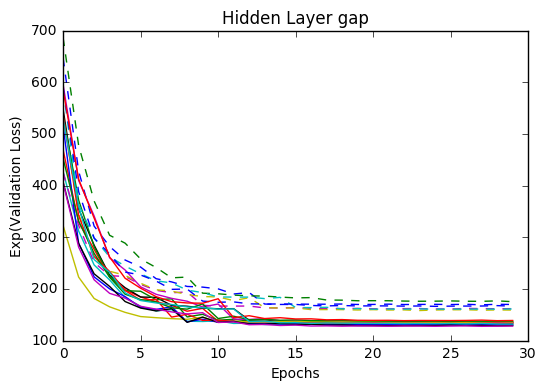

In [7]:
valHist('info_dict/','Hidden Layer gap')

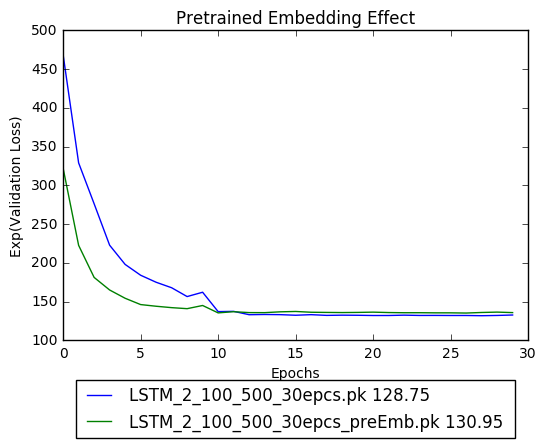

In [92]:
valHist('comparisons/','Pretrained Embedding Effect')